In [1]:
from collections import defaultdict
import subprocess

### Запускаем все эксерименты для `ugd` и `ustm` единой коммандой

Номера `[0, 1, 2]`

In [5]:
all_commands = ""
for method in ['ustm',]:
    for sp in ['dijkstra', 'tradeoff']:
        for eps_number in range(3):
            all_commands = all_commands + f"/home/pvmokrov/miniconda3/bin/python launch_B.py --method {method} --sp {sp} --eps_number {eps_number} & "
all_commands = all_commands[:-3]

In [6]:
all_commands

'/home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 0 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 1 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 2 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 0 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 1 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 2'

In [7]:
subprocess.run(
    all_commands, 
    shell=True, 
    stdout=subprocess.DEVNULL,
    stderr=subprocess.STDOUT)

CompletedProcess(args='/home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 0 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 1 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 2 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 0 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 1 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 2', returncode=0)

Номера `[3, 4, 5]`

In [25]:
all_commands = ""
for method in ['ustm',]:
    for sp in ['dijkstra', 'tradeoff']:
        for eps_number in range(3, 6):
            all_commands = all_commands + f"/home/pvmokrov/miniconda3/bin/python launch_B.py --method {method} --sp {sp} --eps_number {eps_number} & "
all_commands = all_commands[:-3]

In [26]:
all_commands

'/home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 3 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 4 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp dijkstra --eps_number 5 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 3 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 4 & /home/pvmokrov/miniconda3/bin/python launch_B.py --method ustm --sp tradeoff --eps_number 5'

In [ ]:
subprocess.run(
    all_commands, 
    shell=True, 
    stdout=subprocess.DEVNULL,
    stderr=subprocess.STDOUT)

Номера `[6, 7, 8]`

In [24]:
all_commands = ""
for method in ['ugd', 'ustm']:
    for sp in ['dijkstra', 't_swsf', 'tradeoff']:
        for eps_number in range(6, 9):
            all_commands = all_commands + f"/home/pvmokrov/miniconda3/bin/python launch_B.py --method {method} --sp {sp} --eps_number {eps_number} & "
all_commands = all_commands[:-3]

In [ ]:
subprocess.run(
    all_commands, 
    shell=True, 
    stdout=subprocess.DEVNULL,
    stderr=subprocess.STDOUT)

## Plots

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pickle
import numpy as np
beckmann_save = 'beckmann_results/'

In [3]:
results = {}
# 'elapsed_time'
# open(sd_save + 'anaheim_result_' + solver_method + '_sp_' + args.sp + '_eps_abs_' + str(eps_number) + '_SD.pickle', 'wb')

for method in ['ustm', 'ugd']:
    results[method] = {}
    for sp in ['dijkstra', 'tradeoff']:
        sp_results = defaultdict(list)
        i = 0
        while True:
            try:
                with open(beckmann_save + 'anaheim_result_' + method + '_sp_' + sp + '_eps_abs_'
                          + str(i) + '_beckmann.pickle', 'rb') as f:
                    result = pickle.load(f)
                    sp_results['epsilon'].append(result['eps_abs'])
                    sp_results['iters'].append(result['iter_num'])
                    sp_results['inner_iters'].append(result['history'].get('inner_iters')[-1])
                    sp_results['dual_gap_init'].append(result['history'].get('dual_gap')[0])
                    sp_results['elapsed_time'].append(result['elapsed_time'])
            except FileNotFoundError:
                break
            i += 1
        results[method][sp] = sp_results

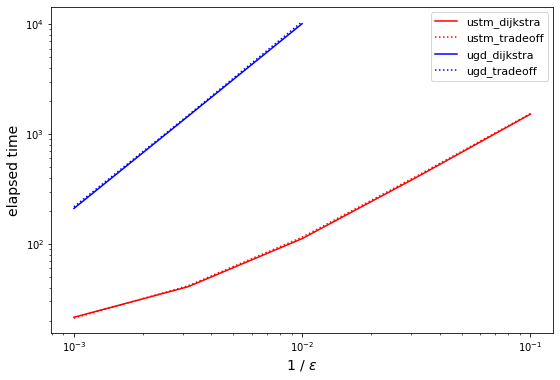

In [4]:
plt.figure(figsize=(9,6))
#plt.title('Convergence for Stable Dynamics model', fontsize=20)
colormap = {'ustm': 'red', 'ugd': 'blue'}
linemap = {'dijkstra': '-', 't_swsf': '--', 'tradeoff': ':'}
for method in ['ustm', 'ugd']:
    color = colormap[method]
    for sp in ['dijkstra', 'tradeoff']:
        linetype = linemap[sp]
        x = 1./np.array(results[method][sp]['epsilon'])
        y = np.array(results[method][sp]['elapsed_time'])
        lbl = method + '_' + sp
        plt.plot(x, y, linetype, color=color, label = lbl)
plt.legend(prop = {'size' : 11})
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\varepsilon$', fontsize = 14)
plt.ylabel('elapsed time', fontsize = 14)
#plt.savefig('SD_convergence_1.jpg', dpi = 300)
plt.show()